In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix , ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

Read in Stroke Dataset

In [2]:
strokeDatasetURL = 'https://raw.githubusercontent.com/JosiahJoeking/Stroke-Dataset/main/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(strokeDatasetURL)

Calculate Average of stroke

In [3]:
strokeAVG = df.loc[:, 'stroke'].mean()

In [4]:
BMI_avg = df.loc[:, 'bmi'].mean()
df = df.fillna(value = BMI_avg)

df.drop(columns=['id'], inplace=True)

nan_df = df[df.isna().any(axis=1)]
no_nan_df = df.dropna()

In [5]:
df_encoded = pd.get_dummies(no_nan_df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [6]:
k_folds = 5

### Normal

In [7]:
inputs = df_encoded.drop("stroke", axis=1).copy()
target = df_encoded["stroke"]

X = inputs.values
y = target.values

kf = KFold(n_splits = k_folds)
kf.get_n_splits(X)

5

In [8]:
feature_df = df_encoded.drop('stroke', axis = 1)
stroke_df = df_encoded['stroke']
cm = np.zeros((2, 2))
acc_score = []
f1_score_array = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]


  scaler = StandardScaler()
  feature_train = scaler.fit_transform(X_train)
  feature_test = scaler.transform(X_test)
  k_values = [i for i in range (1,31)]
  scores = []

  scaler = StandardScaler()
  B = scaler.fit_transform(feature_df)

  for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, B, stroke_df, cv=5)
    scores.append(np.mean(score))
  best_index = np.argmax(scores)
  best_k = k_values[best_index]

  knn = KNeighborsClassifier(n_neighbors=best_k)
  knn.fit(feature_train, y_train)
  pred_values = knn.predict(feature_test)

  cm += confusion_matrix(y_test, pred_values)
  print(classification_report(y_test, pred_values))

  acc = accuracy_score(pred_values , y_test)
  acc_score.append(acc)
  f1 = f1_score(pred_values,  y_test)
  f1_score_array.append(f1)

avg_acc_score = np.mean(acc_score)
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg F1 : {}'.format(np.mean(f1_score_array)))
tn, fp, fn, tp = cm.ravel()
wicm = (10*fn + fp)/(tn + fp + fn + tp)
print('Weighted incorrect classification metric: {}'.format(wicm))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       969
           1       0.00      0.00      0.00        53

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.67      0.05      0.09        42

    accuracy                           0.96      1022
   macro avg       0.81      0.52      0.53      1022
weighted avg       0.95      0.96      0.94      1022

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       1.00      0.02      0.04        56

    accuracy                           0.95      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.95      0.95      0.92      1022

              preci

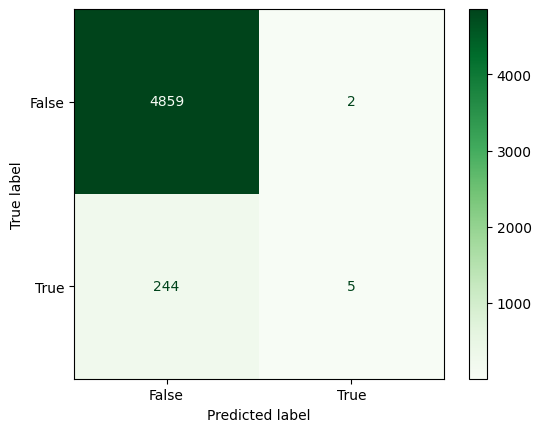

In [9]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot(values_format="0.0f", cmap='Greens')
plt.show()

### Over Sampling

In [10]:
smote = SMOTE(random_state = 42)

In [11]:
shuffled_df = df_encoded.sample(frac=1, random_state=42)
shuffled_df.reset_index(inplace=True)
shuffled_df.drop(columns=['index'], inplace=True)

In [12]:
inputs = shuffled_df.drop("stroke", axis=1).copy()
target = shuffled_df["stroke"]

X = inputs.values
y = target.values

kf = KFold(n_splits = k_folds)
kf.get_n_splits(X)

5

In [13]:
feature_df = shuffled_df.drop('stroke', axis = 1)
stroke_df = shuffled_df['stroke']
cm = np.zeros((2, 2))
acc_score = []
f1_score_array = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  X_train, y_train = smote.fit_resample(X_train, y_train)

  scaler = StandardScaler()
  feature_train = scaler.fit_transform(X_train)
  feature_test = scaler.transform(X_test)
  k_values = [i for i in range (1,31)]
  scores = []

  scaler = StandardScaler()
  B = scaler.fit_transform(feature_df)

  for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, B, stroke_df, cv=5)
    scores.append(np.mean(score))
  best_index = np.argmax(scores)
  best_k = k_values[best_index]

  knn = KNeighborsClassifier(n_neighbors=best_k)
  knn.fit(feature_train, y_train)
  pred_values = knn.predict(feature_test)

  cm += confusion_matrix(y_test, pred_values)
  print(classification_report(y_test, pred_values))

  acc = accuracy_score(pred_values , y_test)
  acc_score.append(acc)
  f1 = f1_score(pred_values,  y_test)
  f1_score_array.append(f1)

avg_acc_score = np.mean(acc_score)
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg F1 : {}'.format(np.mean(f1_score_array)))
tn, fp, fn, tp = cm.ravel()
wicm = (10*fn + fp)/(tn + fp + fn + tp)
print('Weighted incorrect classification metric: {}'.format(wicm))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       971
           1       0.09      0.20      0.13        51

    accuracy                           0.87      1022
   macro avg       0.52      0.55      0.53      1022
weighted avg       0.91      0.87      0.89      1022

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       978
           1       0.06      0.18      0.09        44

    accuracy                           0.85      1022
   macro avg       0.51      0.53      0.51      1022
weighted avg       0.92      0.85      0.88      1022

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       973
           1       0.07      0.16      0.10        49

    accuracy                           0.86      1022
   macro avg       0.51      0.53      0.51      1022
weighted avg       0.91      0.86      0.89      1022

              preci

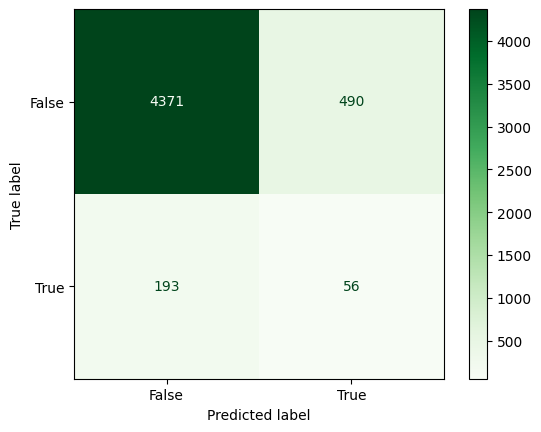

In [14]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot(values_format="0.0f", cmap='Greens')
plt.show()

### Under Sampling

In [15]:
pos = df_encoded[df_encoded['stroke']==1]
neg = df_encoded[df_encoded['stroke']==0]

neg = neg.head(pos.shape[0])
df_undersample = pd.concat([pos,neg],axis=0)
df_undersample = shuffle(df_undersample , random_state=42)
df_undersample.reset_index(drop=True, inplace=True)

inputs = df_undersample.drop('stroke', axis=1).copy()
target = df_undersample['stroke']

In [16]:
X = inputs.values
y = target.values

kf = KFold(n_splits = k_folds)
kf.get_n_splits(X)

5

In [17]:
feature_df = df_undersample.drop('stroke', axis = 1)
stroke_df = df_undersample['stroke']
cm = np.zeros((2, 2))
acc_score = []
f1_score_array = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  X_train, y_train = smote.fit_resample(X_train, y_train)

  scaler = StandardScaler()
  feature_train = scaler.fit_transform(X_train)
  feature_test = scaler.transform(X_test)
  k_values = [i for i in range (1,31)]
  scores = []

  scaler = StandardScaler()
  B = scaler.fit_transform(feature_df)

  for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, B, stroke_df, cv=5)
    scores.append(np.mean(score))
  best_index = np.argmax(scores)
  best_k = k_values[best_index]

  knn = KNeighborsClassifier(n_neighbors=best_k)
  knn.fit(feature_train, y_train)
  pred_values = knn.predict(feature_test)

  cm += confusion_matrix(y_test, pred_values)
  print(classification_report(y_test, pred_values))

  acc = accuracy_score(pred_values , y_test)
  acc_score.append(acc)
  f1 = f1_score(pred_values,  y_test)
  f1_score_array.append(f1)

avg_acc_score = np.mean(acc_score)
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('Avg F1 : {}'.format(np.mean(f1_score_array)))
tn, fp, fn, tp = cm.ravel()
wicm = (10*fn + fp)/(tn + fp + fn + tp)
print('Weighted incorrect classification metric: {}'.format(wicm))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69        49
           1       0.70      0.76      0.73        51

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100

              precision    recall  f1-score   support

           0       0.68      0.60      0.64        45
           1       0.70      0.76      0.73        55

    accuracy                           0.69       100
   macro avg       0.69      0.68      0.68       100
weighted avg       0.69      0.69      0.69       100

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        57
           1       0.64      0.63      0.64        43

    accuracy                           0.69       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.69      0.69      0.69       100

              preci

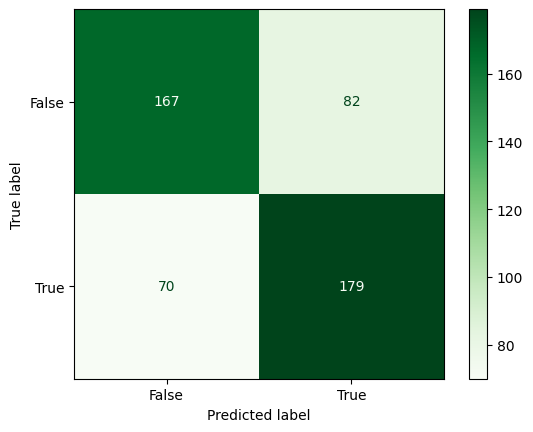

In [18]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot(values_format="0.0f", cmap='Greens')
plt.show()